### Introdcution : 

Learn how to use tensorflow to make simple feedforward nural networks for image classification. I have used MNIST Dataset of handwritten digits for the purpose. 

At the end, i use confusion matrix to get an idea of the incorrectly classified images and see if it makes any sense. Since, it's image dataset we can have a good intution about why some of the the images were incorrectly classified. 

### Code :

In [1]:
import tensorflow as tf

C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Load the data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape", x_train.shape)

x_train.shape (60000, 28, 28)


In [3]:
#Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
#Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [5]:
#Train the model

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/sample - loss: 2.2508 - accuracy: 0.7570 - val_loss: 0.5060 - val_accuracy: 0.8660
Epoch 2/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.5451 - accuracy: 0.8578 - val_loss: 0.3795 - val_accuracy: 0.9015
Epoch 3/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4790 - accuracy: 0.8781 - val_loss: 0.3309 - val_accuracy: 0.9280
Epoch 4/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4092 - accuracy: 0.8937 - val_loss: 0.2810 - val_accuracy: 0.9343
Epoch 5/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3879 - accuracy: 0.8996 - val_loss: 0.2765 - val_accuracy: 0.9377
Epoch 6/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3547 - accuracy: 0.9083 - val_loss: 0.2955 - val_accuracy: 0.9374
Epoch 7/20
60000/60000 [==========================

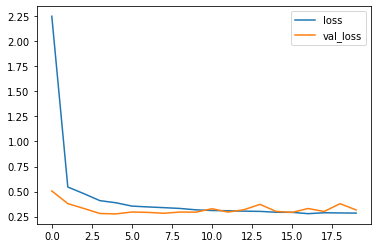

In [11]:
#Plot loss per iteration

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

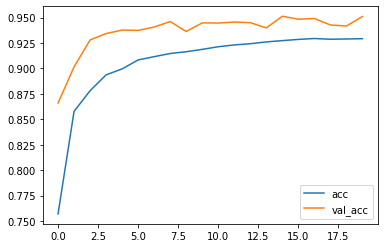

In [7]:
#Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [8]:
#Evaluate the model

model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.1726 - accuracy: 0.9510


[0.3159501911336789, 0.951]

Confusion matrix, without normalizaion
[[ 962    0    3    0    0    0    2    1   12    0]
 [   0 1102    4    1    0    2    1    0   25    0]
 [   1    3  984    6    4    0    0    4   27    3]
 [   0    0   11  942    0    8    0    9   34    6]
 [   1    0    2    0  934    0    5    3    7   30]
 [   5    0    2   26    0  805   10    1   37    6]
 [   8    2    1    0   17    9  902    0   19    0]
 [   1    2   14    4    1    2    0  985    7   12]
 [   5    0    5    0    3    3    3    2  941   12]
 [   2    4    0   12    6    2    0   10   20  953]]


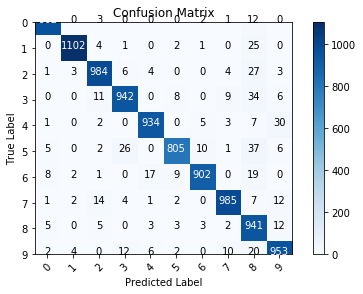

In [9]:
#Plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', 
                         cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.Normalization can be 
    applied by setting 'normalize=True'
    """
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalizaion")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', 
                 color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

    

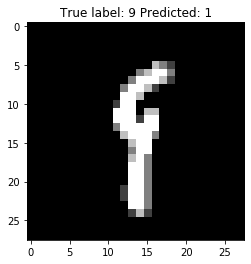

In [10]:
#Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));